In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-pdd9u2l1
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-pdd9u2l1
  Resolved https://github.com/tensorflow/docs to commit be6e9cacfa213e98520dd2b25de5ff5c31281cea
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2025.12.2.70325-py3-none-any.whl size=187019 sha256=2441cb854f478db8e6f32b7c9782bd60c0e950a0d908a8ffd4811515604d6860
  Stored in directory: /tmp/pip-ephem-wheel-cache-eepqhp1m/wheels/3e/88/34/48d2789bc9d37b33ddce06bccc454fae0285e5396d0a5be9d9
Successfully built tensorflow-docs


In [2]:
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.19.0


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [6]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

      0/Unknown 0s 0s/step

'/root/.keras/datasets/auto-mpg.data'

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

In [8]:
dataset = pd.read_csv(dataset_path, names=column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [10]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
dataset.skew()

,0
MPG,0.457066
Cylinders,0.526922
Displacement,0.719645
Horsepower,1.087326
Weight,0.531063
Acceleration,0.278777
Model Year,0.011535
Origin,0.923776


In [12]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [13]:
dataset.shape

(398, 8)

In [14]:
dataset = dataset.dropna()

In [15]:
dataset.shape

(392, 8)

In [16]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [17]:
dataset = pd.get_dummies(dataset,prefix='',prefix_sep='', dtype=float).astype(int)
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27,4,140,86,2790,15,82,0,0,1
394,44,4,97,52,2130,24,82,1,0,0
395,32,4,135,84,2295,11,82,0,0,1
396,28,4,120,79,2625,18,82,0,0,1
397,31,4,119,82,2720,19,82,0,0,1


# **Train-Test Data Split**

In [18]:
train_dataset = dataset.sample(frac=0.8,random_state=0)

In [19]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28,4,90,75,2125,14,74,0,0,1
282,22,4,140,88,2890,17,79,0,0,1
69,12,8,350,160,4456,13,72,0,0,1
378,38,4,105,63,2125,14,82,0,0,1
331,33,4,97,67,2145,18,80,0,1,0


In [20]:
train_dataset.shape

(314, 10)

In [21]:
test_dataset = dataset.drop(train_dataset.index)

In [22]:
test_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
9,15,8,390,190,3850,8,70,0,0,1
25,10,8,360,215,4615,14,70,0,0,1
28,9,8,304,193,4732,18,70,0,0,1
31,25,4,113,95,2228,14,71,0,1,0
33,19,6,232,100,2634,13,71,0,0,1


In [23]:
test_dataset.shape

(78, 10)

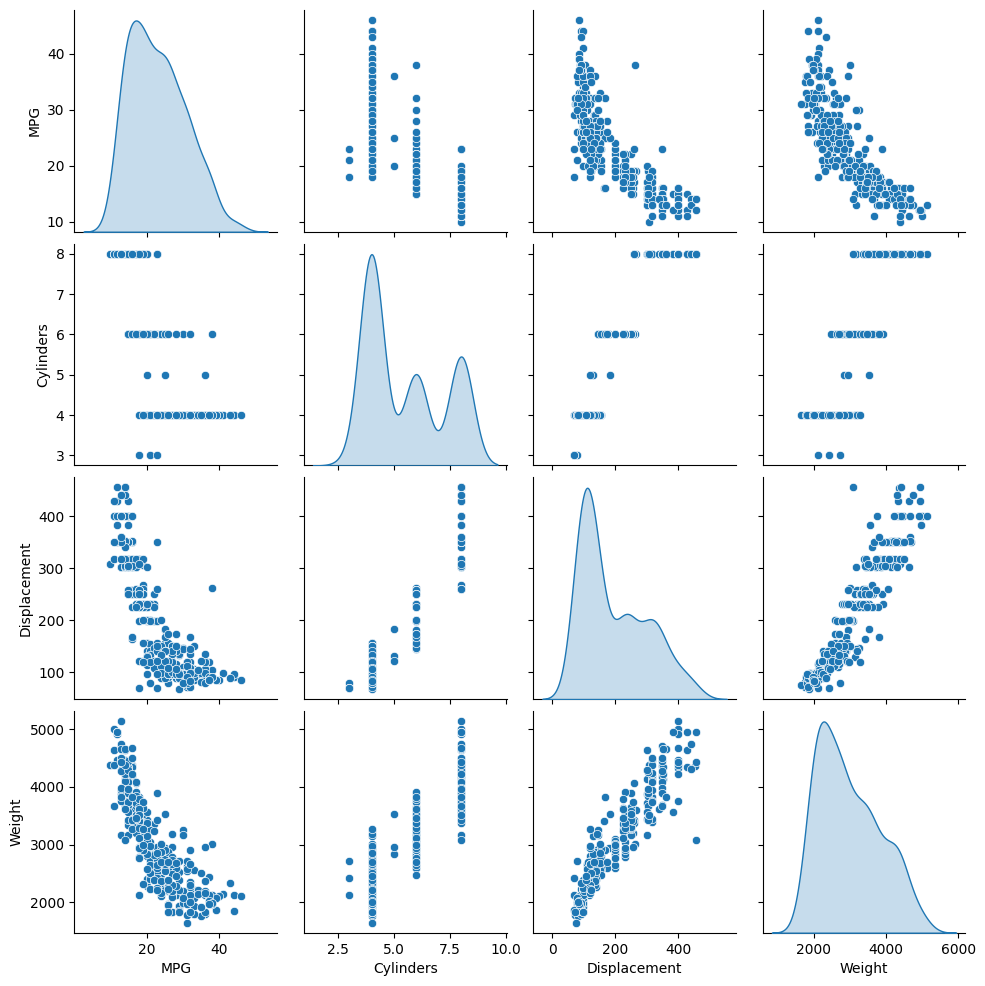

In [24]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [25]:
train_stats=train_dataset.describe()
train_stats.pop("MPG")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.197452,2.774690,8.0,13.00,15.0,17.00,24.0
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


# **`Split Features from MPG`**

In [26]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [27]:
train_labels.head()

,MPG
146,28
282,22
69,12
378,38
331,33


In [28]:
test_labels.head()

,MPG
9,15
25,10
28,9
31,25
33,19


# **Normalize the Data**

In [29]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [30]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [31]:
normed_train_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.431562,-0.516397,-0.465148,-0.495225,0.774676
282,-0.869348,-0.530218,-0.442811,-0.118796,0.649639,0.843910,-0.465148,-0.495225,0.774676
69,1.483887,1.482595,1.447140,1.736877,-0.791963,-1.060519,-0.465148,-0.495225,0.774676
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.431562,1.660094,-0.465148,-0.495225,0.774676
331,-0.869348,-0.942365,-0.994047,-1.001603,1.010040,1.115971,-0.465148,2.012852,-1.286751


In [32]:
normed_test_data.skew()

,0
Cylinders,0.535555
Displacement,0.631708
Horsepower,1.174569
Weight,0.495667
Acceleration,0.163069
Model Year,-0.014695
Europe,1.956637
Japan,1.393293
USA,-0.541018


# **Build the Model**

In [33]:
train_dataset.shape[1]

9

In [34]:
def build_model():
  model = keras.Sequential([
        layers.Dense(64, activation="relu",input_shape=(9,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
  return model


In [35]:
model = build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


array([[-0.03444377],
       [ 0.14278813],
       [ 0.36278495],
       [ 0.27342895],
       [ 0.35981685],
       [ 0.12406649],
       [ 0.39861423],
       [ 0.6634035 ],
       [-0.00144409],
       [ 0.11701421]], dtype=float32)

# **Train the Model**

In [38]:
EPOCHS = 1000

In [39]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:550.0143,  mae:22.1799,  mse:550.0143,  val_loss:539.6303,  val_mae:21.8747,  val_mse:539.6303,  
....................................................................................................
Epoch: 100, loss:6.0585,  mae:1.7299,  mse:6.0585,  val_loss:8.9876,  val_mae:2.2930,  val_mse:8.9876,  
....................................................................................................
Epoch: 200, loss:5.2102,  mae:1.6022,  mse:5.2102,  val_loss:8.3486,  val_mae:2.1904,  val_mse:8.3486,  
....................................................................................................
Epoch: 300, loss:4.8079,  mae:1.4718,  mse:4.8079,  val_loss:8.4859,  val_mae:2.2053,  val_mse:8.4859,  
....................................................................................................
Epoch: 400, loss:4.2306,  mae:1.3609,  mse:4.2306,  val_loss:8.9271,  val_mae:2.2517,  val_mse:8.9271,  
..............................................................

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.471775,0.971677,2.471775,9.429013,2.388053,9.429013,995
996,2.601120,1.009180,2.601120,9.217990,2.269200,9.217990,996
997,2.344867,0.916117,2.344867,9.326637,2.338914,9.326637,997
998,2.767249,1.003650,2.767249,8.944161,2.238643,8.944161,998
999,2.497138,0.974261,2.497138,9.320145,2.316243,9.320145,999


Text(0, 0.5, 'MAE [MPG]')

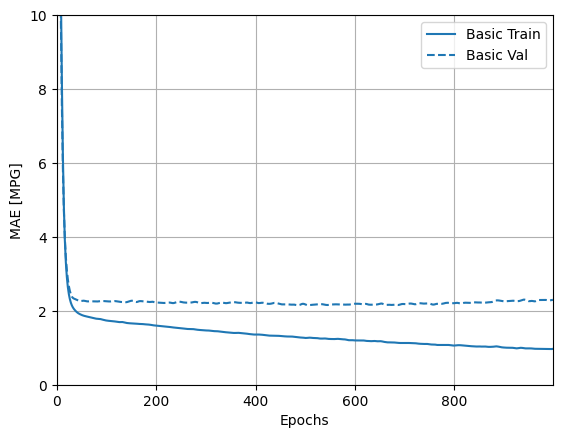

In [41]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

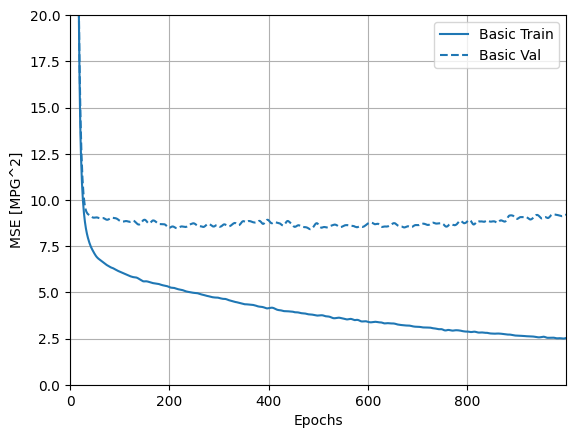

In [42]:
plotter.plot({'Basic': history}, metric="mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

# **Early Stopping**

In [43]:
model=build_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
early_history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[earlystop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:570.7463,  mae:22.5661,  mse:570.7463,  val_loss:567.3206,  val_mae:22.4314,  val_mse:567.3206,  
......................................................................

In [45]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
65,6.520873,1.763012,6.520873,8.748597,2.152699,8.748597,65
66,6.673344,1.768343,6.673344,8.611285,2.151676,8.611285,66
67,6.686553,1.790842,6.686553,8.461813,2.199183,8.461813,67
68,6.547624,1.763064,6.547624,8.389639,2.187609,8.389639,68
69,6.352894,1.749258,6.352894,8.381873,2.140712,8.381873,69


Text(0, 0.5, 'MAE [MPG]')

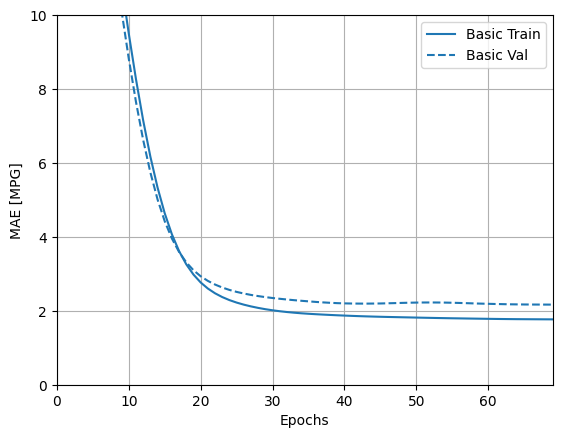

In [46]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [47]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 14ms/step - loss: 5.6802 - mae: 1.8816 - mse: 5.6802
Testing set Mean Abs Error:  1.88 MPG


# **Make Predictions**

In [48]:
print(model.predict(normed_test_data))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[16.68122 ]
 [10.983028]
 [11.100521]
 [23.420797]
 [20.705675]
 [13.36345 ]
 [13.263231]
 [12.467466]
 [19.52009 ]
 [30.187243]
 [24.584476]
 [25.183489]
 [14.889275]
 [26.01178 ]
 [12.40575 ]
 [14.778615]
 [14.931017]
 [13.133698]
 [18.545294]
 [13.07274 ]
 [14.399061]
 [26.235872]
 [19.454124]
 [20.667742]
 [30.407763]
 [23.764801]
 [16.393126]
 [23.049349]
 [16.952837]
 [19.248623]
 [28.444145]
 [21.994719]
 [18.431324]
 [21.159212]
 [26.38906 ]
 [15.865523]
 [19.1382  ]
 [31.975832]
 [30.323393]
 [17.703281]
 [31.448484]
 [29.619062]
 [15.307331]
 [37.01745 ]
 [34.812572]
 [35.938522]
 [20.285372]
 [21.978012]
 [18.980947]
 [26.418789]
 [31.253567]
 [18.40848 ]
 [32.639698]
 [17.675089]
 [17.129906]
 [17.189157]
 [33.528145]
 [35.242996]
 [22.056223]
 [25.055737]
 [39.45433 ]
 [33.688385]
 [27.763891]
 [28.078043]
 [33.253563]
 [40.0317  ]
 [37.394623]
 [35.40326 ]
 [33.717663]
 [30.948793]
 [22.387167]
 [22.276976]
 [29.920544]
 [30.83175 ]


In [49]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([16.68122 , 10.983028, 11.100521, 23.420797, 20.705675, 13.36345 ,
       13.263231, 12.467466, 19.52009 , 30.187243, 24.584476, 25.183489,
       14.889275, 26.01178 , 12.40575 , 14.778615, 14.931017, 13.133698,
       18.545294, 13.07274 , 14.399061, 26.235872, 19.454124, 20.667742,
       30.407763, 23.764801, 16.393126, 23.049349, 16.952837, 19.248623,
       28.444145, 21.994719, 18.431324, 21.159212, 26.38906 , 15.865523,
       19.1382  , 31.975832, 30.323393, 17.703281, 31.448484, 29.619062,
       15.307331, 37.01745 , 34.812572, 35.938522, 20.285372, 21.978012,
       18.980947, 26.418789, 31.253567, 18.40848 , 32.639698, 17.675089,
       17.129906, 17.189157, 33.528145, 35.242996, 22.056223, 25.055737,
       39.45433 , 33.688385, 27.763891, 28.078043, 33.253563, 40.0317  ,
       37.394623, 35.40326 , 33.717663, 30.948793, 22.387167, 22.276976,
       29.920544, 30.83175 , 36.552658, 36.50414 , 38.79392 , 30.298595],
      dtype=float32)

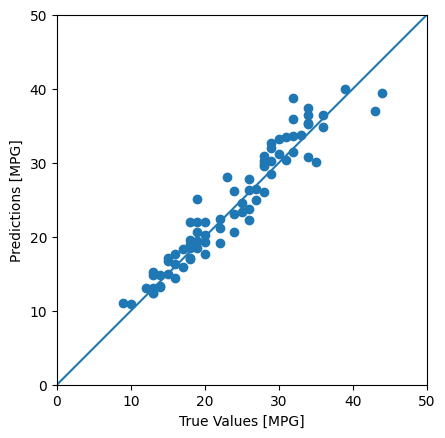

In [50]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# **Model Tuning**

In [51]:
model = keras.Sequential([layers.Dense(256, activation="relu",input_shape=(9,)),
        layers.Dense(256, activation="relu"),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
history_large = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:265.3260,  mae:13.0535,  mse:265.3260,  val_loss:31.2524,  val_mae:4.1534,  val_mse:31.2524,  
....................................................................................................

In [53]:
hist_large = pd.DataFrame(history_large.history)
hist_large['epoch'] = history_large.epoch
hist_large.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,6.069470,1.668002,6.069470,24.239704,4.101357,24.239704,95
96,5.649453,1.811094,5.649453,13.154043,2.897185,13.154043,96
97,9.078809,2.245776,9.078809,12.329390,2.828969,12.329390,97
98,4.813703,1.596556,4.813703,10.882595,2.757956,10.882595,98
99,10.126161,2.408704,10.126161,9.030923,2.256154,9.030923,99


Text(0, 0.5, 'MAE [MPG]')

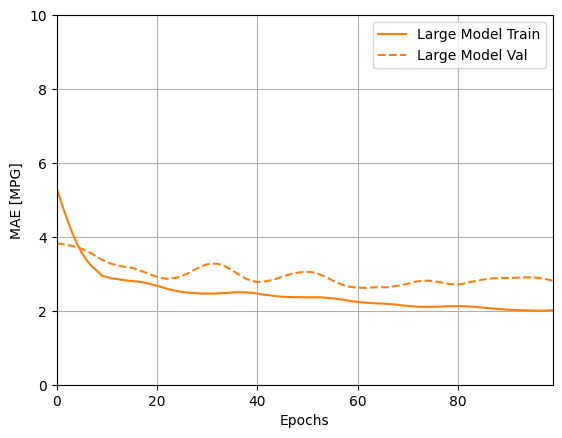

In [54]:
plotter.plot({'Large Model': history_large}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

# **`Weight Regularization`**

**L2 weight Regularization**

In [55]:
from tensorflow.keras import regularizers

In [56]:
model = keras.Sequential([layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01),input_shape=(9,)),
        layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01)),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,193 (782.00 KB)

 Trainable params: 200,193 (782.00 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history_l2 = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:303.1321,  mae:13.9829,  mse:295.4336,  val_loss:40.4277,  val_mae:4.8259,  val_mse:32.9004,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

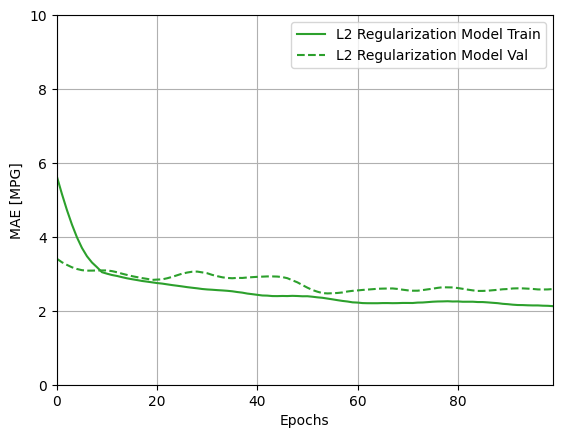

In [59]:
plotter.plot({'L2 Regularization Model': history_l2}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

**Dropout**

In [60]:
model = keras.Sequential([layers.Dense(256, activation="relu",input_shape=(9,)),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
history_dropout = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:296.8219,  mae:14.4575,  mse:296.8219,  val_loss:24.5585,  val_mae:4.1088,  val_mse:24.5585,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

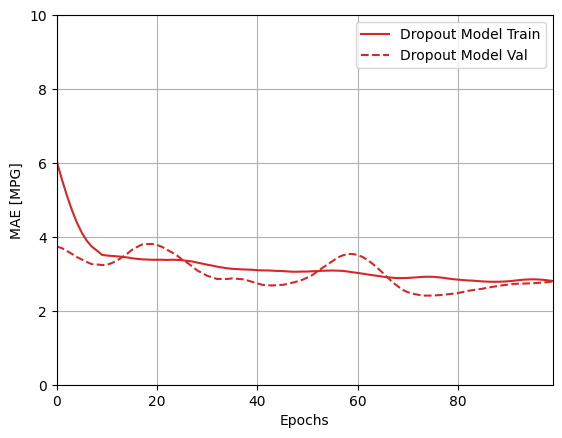

In [62]:
plotter.plot({'Dropout Model': history_dropout}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [63]:
print(model.evaluate(normed_test_data, test_labels, verbose=2))

3/3 - 0s - 17ms/step - loss: 12.4311 - mae: 2.7215 - mse: 12.4311
[12.43108081817627, 2.721493721008301, 12.43108081817627]


In [66]:
type(model.evaluate(normed_test_data, test_labels, verbose=2))

3/3 - 0s - 20ms/step - loss: 12.4311 - mae: 2.7215 - mse: 12.4311


list

In [67]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 19ms/step - loss: 12.4311 - mae: 2.7215 - mse: 12.4311
Testing set Mean Abs Error:  2.72 MPG


**Dropout + L2**

In [68]:
model = keras.Sequential([layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01),input_shape=(9,)),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,193 (782.00 KB)

 Trainable params: 200,193 (782.00 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history_l2_dropout = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:295.5744,  mae:13.9925,  mse:287.7861,  val_loss:50.6628,  val_mae:5.0237,  val_mse:42.9058,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

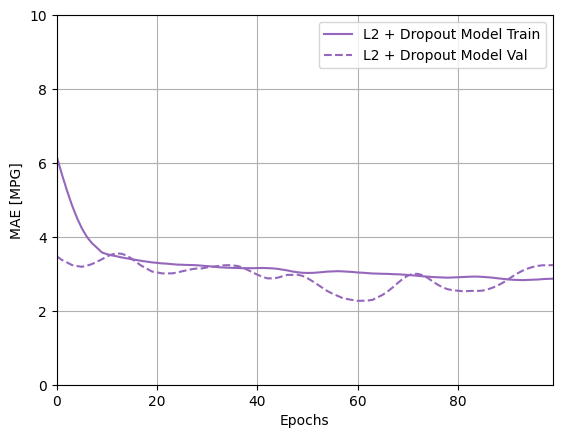

In [71]:
plotter.plot({'L2 + Dropout Model': history_l2_dropout}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [72]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 19ms/step - loss: 9.8786 - mae: 1.9522 - mse: 6.4920
Testing set Mean Abs Error:  1.95 MPG


**Dropout + L2 + Earlystopping**

In [78]:
model = keras.Sequential([layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01),input_shape=(9,)),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu",kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [79]:
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
early_dropout_l2_history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2,
                    verbose=0, callbacks=[earlystop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:272.3653,  mae:13.2752,  mse:264.6108,  val_loss:59.6731,  val_mae:6.1605,  val_mse:51.9973,  
.......................................................

Text(0, 0.5, 'MAE [MPG]')

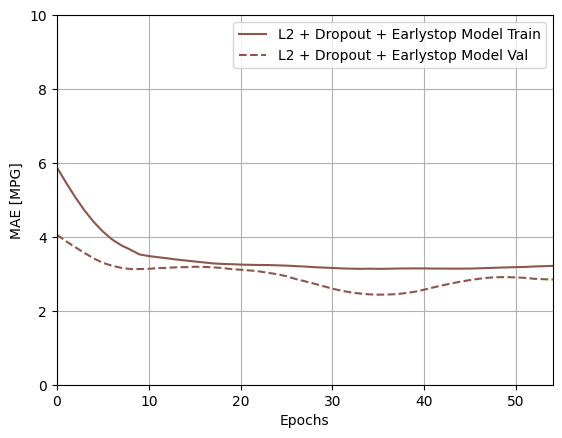

In [80]:
plotter.plot({'L2 + Dropout + earlystop Model': early_dropout_l2_history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [81]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 46ms/step - loss: 13.5365 - mae: 2.3463 - mse: 9.5195
Testing set Mean Abs Error:  2.35 MPG


# **Batch Normalization**

In [82]:
model = keras.Sequential([layers.Dense(256, activation="relu",input_shape=(9,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,289 (798.00 KB)

 Trainable params: 202,241 (790.00 KB)

 Non-trainable params: 2,048 (8.00 KB)

In [84]:
history_batch_norm = model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2,
                          verbose=0, callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:544.2928,  mae:22.8854,  mse:544.2928,  val_loss:587.1949,  val_mae:23.1034,  val_mse:587.1949,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

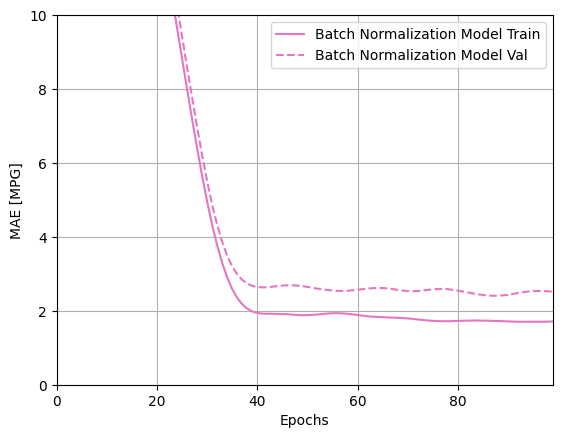

In [85]:
plotter.plot({'Batch Normalization Model': history_batch_norm}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')